In [7]:
# 1.Import necessary libraries and load the dataset and display random 5 samples. 
# Check the info of the data and write your findings. (2 points)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# data
df = pd.read_csv('adult.csv')
df.head()

df.info()

# findings
'''
At a first glimpse we have an idea of Categorical and Numerical features
Categorical features (object) {code : df['native.country'].nunique(), df.describe(include='object')}
    - workclass (9)
    - education (16)
    - marital.status (7)
    - occupation (15)
    - relationship (6)
    - race (5)
    - sex (2)
    - native.country (42)
    - income (2)
    
Numerical features (int)
    - age 
    - fnlwgt
    - education.num
    - capital.gain
    - capital.loss
    - hours.per.week

we can perform one-hot-encoding
    - sex (male:1, female:0)
    - income (<=50K:0, >50K:1)
    
we have missing values (?)
    - workclass      : 1836
    - occupation     : 1843
    - native.country : 583

'''
df.describe()
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [ ]:
# EDA

In [2]:
# 2.What is the average age of males and females in the data? (1 point)

df.groupby('sex').age.mean().to_frame().reset_index(drop=False) # method 1


pd.pivot_table(data=df[['sex','age']],index='sex',values='age',aggfunc={'age':np.mean},fill_value=0).reset_index() # method 2

,sex,age
0,Female,36.858230
1,Male,39.433547


HS-grad qualification of most of the individual is 10501


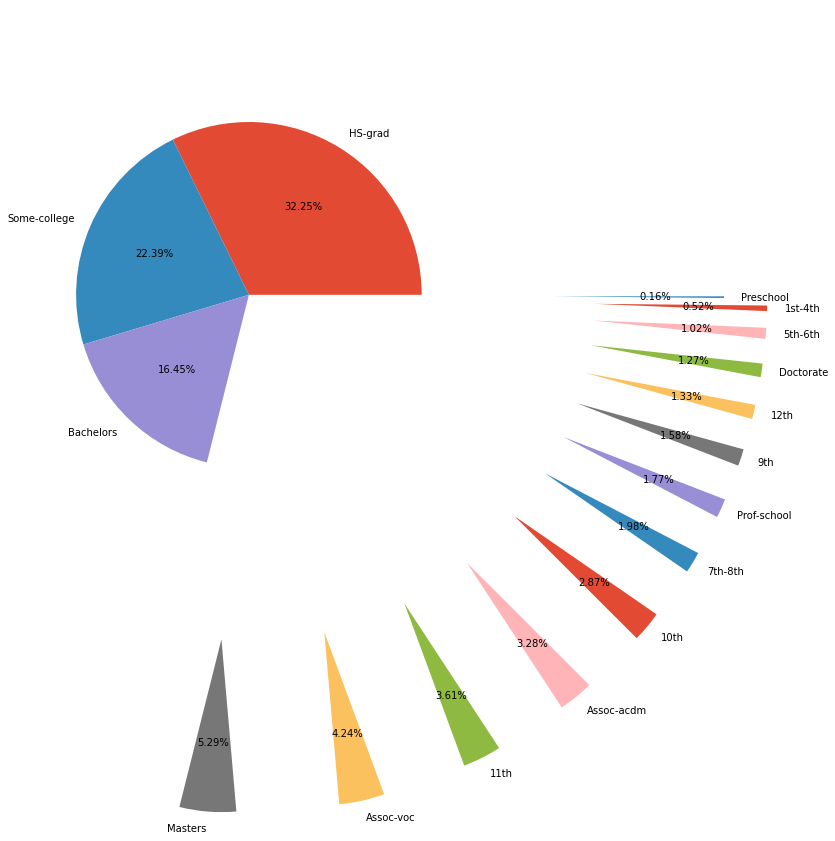

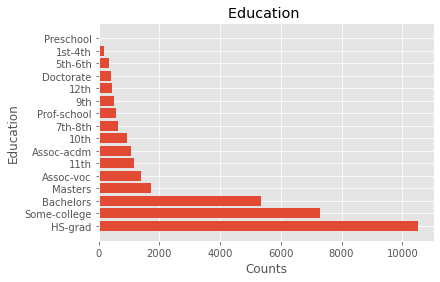

In [51]:
# 3.Identify the qualifications of most of the individuals and display it using an appropriate plot
print(f'{df.education.mode()[0]} qualification of most of the individual is {df.education.value_counts()[0]}')

# plot
data = df.education.value_counts()
# print(data,data.index,data.values)

fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
ax.axis('equal')
ax.pie(data,labels=data.index,autopct='%1.2f%%', explode=[0,0,0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.75])
plt.show()

plt.barh(data.index,data.values)
plt.ylabel('Education')
plt.xlabel('Counts')
plt.title('Education ')
plt.show()

In [4]:
# 4.Find the middle most observation of age for different working classes. (1 point)
pd.pivot_table(data=df,index='workclass',values='age',aggfunc={'age':np.median}).reset_index()

,workclass,age
0,?,35
1,Federal-gov,43
2,Local-gov,41
3,Never-worked,18
4,Private,35
5,Self-emp-inc,45
6,Self-emp-not-inc,44
7,State-gov,39
8,Without-pay,57


In [5]:
# 5.What is the percentage of the Asian-Pac-Islander race people in the data? (1 point)
race_with = df['race'][df['race']=='Asian-Pac-Islander'].agg('count')
race_without = df['race'][df['race']!='Asian-Pac-Islander'].agg('count')

# percentage
percent = race_with / (race_with + race_without)

print(f'There are {round(percent,2)}% of the Asian-Pac-Islander race people in the data')

There are 0.03% of the Asian-Pac-Islander race people in the data


In [6]:
# 6.Which occupation has more variability in the working hours? (1 point)
data = df[['hours.per.week','education']].groupby('education').agg('var').reset_index()
print(data)

# method 2
data = pd.pivot_table(data=df[['hours.per.week','education']],index='education',values='hours.per.week',aggfunc={'hours.per.week':np.var}).reset_index()
data = data[data['hours.per.week']==data['hours.per.week'].max()]
print(f'\n"{data.iloc[0,0]}" occupation has more variability in the working hours with {round(data.iloc[0,1],2)}')

       education  hours.per.week
0           10th      190.112046
1           11th      195.032844
2           12th      159.426289
3        1st-4th      165.089785
4        5th-6th      111.338941
5        7th-8th      201.693102
6            9th      122.420996
7     Assoc-acdm      148.758659
8      Assoc-voc      116.497148
9      Bachelors      131.015157
10     Doctorate      227.540551
11       HS-grad      128.454056
12       Masters      150.744394
13     Preschool      157.632941
14   Prof-school      219.218765
15  Some-college      162.866106

"Doctorate" occupation has more variability in the working hours with 227.54


In [7]:
# 7.What is the range of the middle 50% of working hours per week? (2 points) 
data = df['hours.per.week'].describe() # method 1 : data['50%']
data = df['hours.per.week'].quantile(0.50) # method 2
print(f"The range of middle 50% is {data} of working hours per week")

The range of middle 50% is 40.0 of working hours per week


There is only one feature name "education.num" with a negative skewed of -0.31


<AxesSubplot:ylabel='Frequency'>

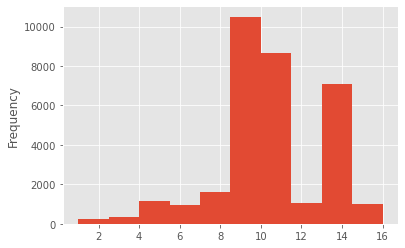

In [8]:
# 8. Are there any negatively skewed features? Support your answer with a metric and the plot. (2 points)
data = df.skew(numeric_only=True)
data = data[data < 0]

print(f'There is only one feature name "{data.index[0]}" with a negative skewed of {round(data[0],2)}')

# plot
df[data.index[0]].plot(kind='hist')

There are exactly 121 extreme values in age.


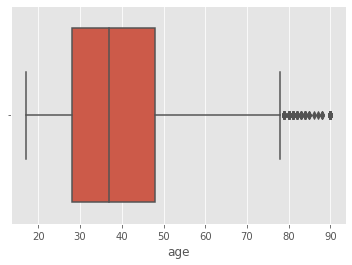

In [8]:
# 9.Identify the presence of extreme values in age using visualization techniques. (1 point)
# matplotlib : boxplot, scatter_plot, z-scores, iqr
# plt.boxplot(df['age'])
# plt.title('The presence of Extreme values in age')
# plt.show()

# seaborn : boxplot, scatter_plot, z-scores, iqr
sns.boxplot(df['age']) # boxplot is efficient and clean to represent the outliers

# values
data = df['age'][df['age']>79]
print(f'There are exactly {data.size} extreme values in age.')
# print(data.values)

we cannot say there is a cause and effect relationship between "age" on a particular working hours of a person, but we can say there is a association of 0.06876
Inorder to support the above theory we have to use linear regression to check whether there is any effect or not


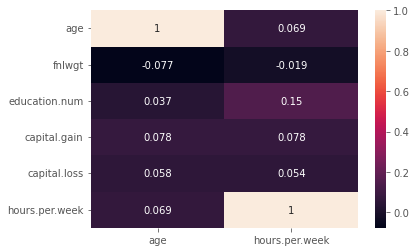

In [9]:
# 10.Is there any effect of age on the working hours of a person? Support your answer with a metric and the plot. (2 points)
data = df.corr()[['age','hours.per.week']].iloc[0,1].round(decimals=5)
print(f'we cannot say there is a cause and effect relationship between "age" on a particular working hours of a person, but we can say there is a association of {data}')
print('Inorder to support the above theory we have to use linear regression to check whether there is any effect or not')

# plot : heat map
sns.heatmap(df.corr()[['age','hours.per.week']], annot=True)
plt.show()

In [11]:
# 11.Is there any individual with age less than 18 and capital loss less than 100? (2 points)
data = df[(df['age']<18) & (df['capital.loss']<100)]

print(f'There are exactly "{data.shape[0]}" individuals with "age less than 18" and "capital loss less than 100"')

There are exactly "385" individuals with "age less than 18" and "capital loss less than 100"


In [12]:
# 12.Which occupation has the highest number of males? (1 point)
data = pd.pivot_table(df,index='occupation',values='sex',aggfunc={'sex':'count'}).reset_index()
data = data[data.sex == data['sex'].max()]

print(f'"{data.iloc[0,0]}" occupation has the highest number of {data.iloc[0,1]} males.')

"Prof-specialty" occupation has the highest number of 4140 males.


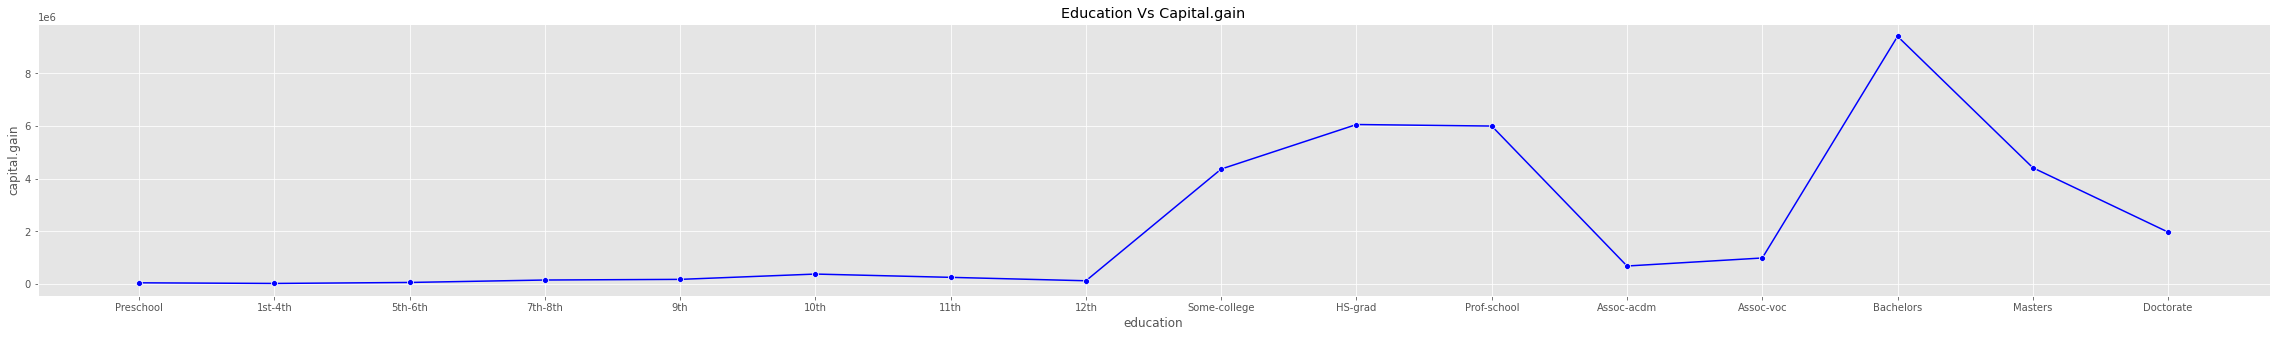


# Interpretation
- Bachelors education having more and high capital.gain of 9404984
- There is a turning point after 12th of sudden jump to 123010 there is capital.gain has improved gradually before it was linear and constant
- But there is drop after Prof-school which is 'Assoc-acdm','Assoc-voc' and after there is again jump in the bachelors
- We can say, those two categories are having a rough capital.gain 

# Conclusion
- through out education time-period
    - there is rough time in Assoc-acdm, Assoc-voc & Masters, Doctorate
    - there is good time after 12th and Assoc-voc



In [45]:
# 13.Analyze the trend of the capital gain amount for different educational qualifications and write your observations. (1 point)
# method 1
data = pd.pivot_table(data=df[['capital.gain','education']],index='education',values='capital.gain',aggfunc={'capital.gain':'sum'}).sort_values('capital.gain').reset_index()
data

# method 2
data = df.groupby('education')['capital.gain'].sum().reset_index()
data['education'] = pd.Categorical(data['education'], ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','Some-college','HS-grad','Prof-school','Assoc-acdm','Assoc-voc','Bachelors','Masters','Doctorate'])
# print(data)

# plot : line 
fig, ax = plt.subplots(figsize=(40, 5))
sns.lineplot(x=data['education'],y=data['capital.gain'],marker='o',color='b',ax=ax)
plt.title('Education Vs Capital.gain')
plt.show()

# observations
print('''
# Interpretation
- Bachelors education having more and high capital.gain of 9404984
- There is a turning point after 12th of sudden jump to 123010 there is capital.gain has improved gradually before it was linear and constant
- But there is drop after Prof-school which is 'Assoc-acdm','Assoc-voc' and after there is again jump in the bachelors
- We can say, those two categories are having a rough capital.gain 

# Conclusion
Through out education time-period
    - there is rough time in Assoc-acdm, Assoc-voc & Masters, Doctorate
    - there is good time after 12th and Assoc-voc
''')

In [47]:
# 14.Compare the working hours for each working class and write your observations. (1 point)
data = pd.pivot_table(data=df,index='workclass',values='hours.per.week',aggfunc={'hours.per.week':['count','sum','max','min','mean','median']}).T
print(data)

# observation
print("""
'?'                 : there are 1836 unknown individuals and worked on an average 31.92 and 50% is 36
'Federal-gov'       : there is no much difference between mean and median of 1.379167 and ranges from 4 - 99
'Local-gov'         : there is no much difference between mean and median of 0.9828 and ranges from 2 - 99
'Never-worked'      : there are extreme values in the data so the mean and median vary of 6.571429 and ranges from 4 - 40
'Private'           : there is no much difference between mean and median of 0.267096 and ranges from 1 - 99
'Self-emp-inc'      : there are extreme values in the data so the mean and median vary of 1.1819 and ranges from 1 - 99
'Self-emp-not-inc'  : there are extreme values in the data so the mean and median vary of 4.421881 and ranges from 1 - 99 
'State-gov'         : there is no much difference between mean and median of 0.968413 and ranges from 1 - 99
'Without-pay'       : there are extreme values in the data so the mean and median vary of 5.214286 and ranges from 10 - 65   
""")


workclass            ?   Federal-gov   Local-gov  Never-worked        Private  \
count       1836.00000    960.000000   2093.0000      7.000000   22696.000000   
max           99.00000     99.000000     99.0000     40.000000      99.000000   
mean          31.91939     41.379167     40.9828     28.428571      40.267096   
median        36.00000     40.000000     40.0000     35.000000      40.000000   
min            1.00000      4.000000      2.0000      4.000000       1.000000   
sum        58604.00000  39724.000000  85777.0000    199.000000  913902.000000   

workclass  Self-emp-inc  Self-emp-not-inc     State-gov  Without-pay  
count         1116.0000       2541.000000   1298.000000    14.000000  
max             99.0000         99.000000     99.000000    65.000000  
mean            48.8181         44.421881     39.031587    32.714286  
median          50.0000         40.000000     40.000000    27.500000  
min              1.0000          1.000000      1.000000    10.000000  
sum   

In [48]:
# 15.Is there an all male profession according to the data? (1 point)
data = pd.pivot_table(df,index=['sex','occupation'],aggfunc='count').reset_index()
data

data = df.groupby(['occupation','sex'])['sex'].count()
print(data)

print(f'\nThere is only one male profession in Armed-Forces with count of 9')

occupation         sex   
?                  Female     841
                   Male      1002
Adm-clerical       Female    2537
                   Male      1233
Armed-Forces       Male         9
Craft-repair       Female     222
                   Male      3877
Exec-managerial    Female    1159
                   Male      2907
Farming-fishing    Female      65
                   Male       929
Handlers-cleaners  Female     164
                   Male      1206
Machine-op-inspct  Female     550
                   Male      1452
Other-service      Female    1800
                   Male      1495
Priv-house-serv    Female     141
                   Male         8
Prof-specialty     Female    1515
                   Male      2625
Protective-serv    Female      76
                   Male       573
Sales              Female    1263
                   Male      2387
Tech-support       Female     348
                   Male       580
Transport-moving   Female      90
                   Mal